FileNotFoundError: ignored

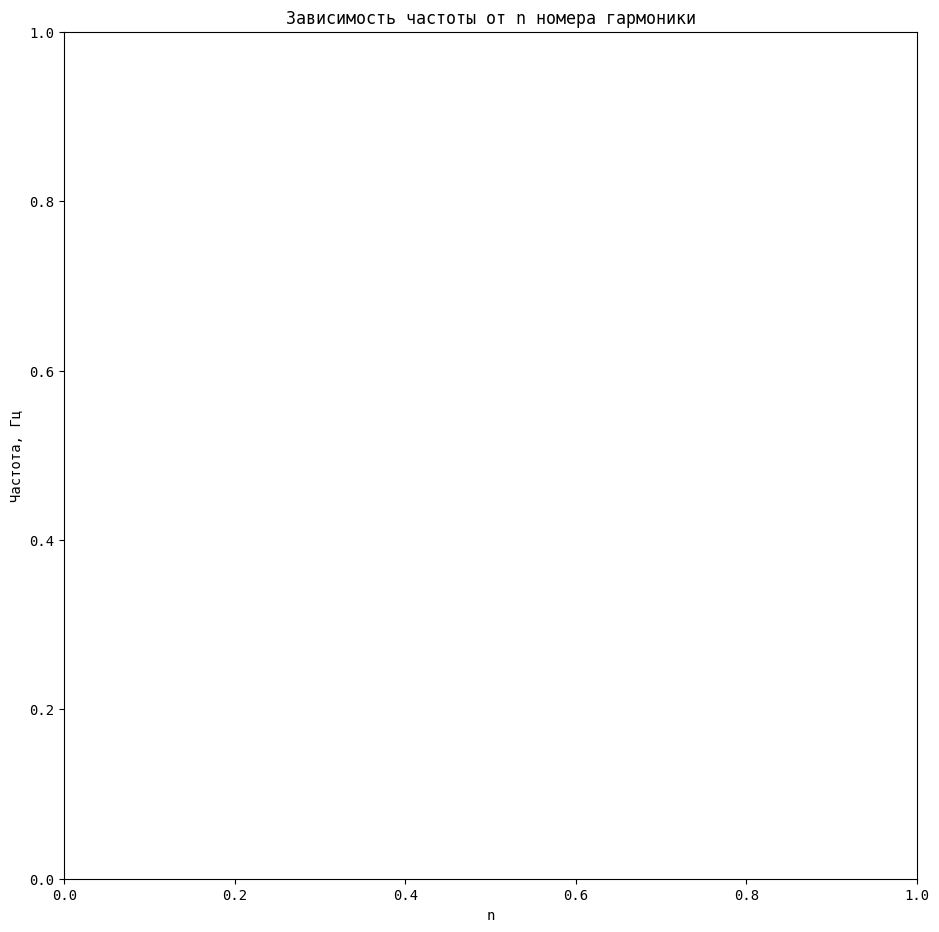

In [1]:
import matplotlib.pyplot as plt                     #include libs
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import numpy as np

plt.rcParams["font.family"] = "monospace"

def mapping(x, k):                #Function of approximating give to curve_fit
    return  k*x

plt.figure(figsize=(11,11))                                #Create graphic in matplotlib
plt.title(r"Зависимость частоты от n номера гармоники")
plt.ylabel("Частота, Гц")
plt.xlabel("n")

#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------

#processing data

x = []
y1 = []
y2 = []

#FILE "data.txt" !!!!!!!!!!!! YOU NEED TO UPLOAD IT TO COLAB

file = open('data.txt', 'r')                 #open file with data
while (line := file.readline()):              # every line have x, y, y1 ...
  s = line.split()
  if (len(s) != 0):
    x.append(float(s[0].replace(',','.')))    #collect in x[] y1[] y2[] with change "," -> "." (if excel)
    y1.append(float(s[1].replace(',','.')))

k1 = 0                                        #create coeffs all in function

coeffs,_ = curve_fit(mapping, x, y1)          #give func and our measurements
k1 = coeffs                                   #it returns array of aproximating coeffs

y1_fit = []
for i in range(len(x)):
  y1_fit.append(k1 * x[i])                    #with coeffs make array of Approximating data
#                 ^
#                 |
#                 function need to write
#                 """"""""""""""""""""""

plt.plot(x, y1, 'r^', label='Частота от номера гармоники реальная')    #triangles with measurments
plt.plot(x, y1_fit, color = 'y', label = f"1: Реальная прямая(с аппроксимацией) " r'$\nu_{1}(n) = u_{1} \cdot n$' f", u = {k1[0]:.3f}") #approximating praphic

#----------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------

plt.grid(visible = True, which='major', axis='both', alpha=1)           #end of matplotlib
plt.grid(visible = True, which='minor', axis='both', alpha=1)           #show graphic
plt.legend()
plt.show()
plt.savefig('graphic.png')
file.close()